In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import linprog
%matplotlib inline
rcParams["figure.figsize"]=(18,5)

[92, 83, 78, 68, 54, 0, 0, 0, 0, 0, 0, 0]


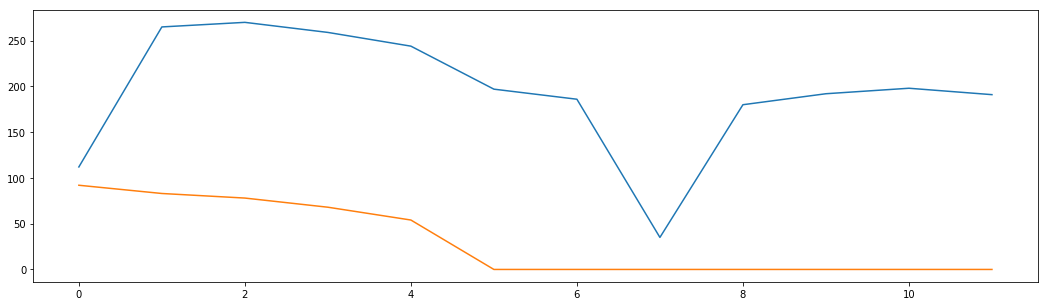

In [33]:
# Planing horizont
h = 12
# Prediction
goal = [112, 265, 270, 259, 244, 197, 186, 35, 180, 192, 198, 191]
# Residuals from previous year
residuals = [9, 5, 10, 14, 54, 0, 0, 0, 0, 0, 0, 0]
# X0 vector
x0 = [sum(residuals[i:]) for i in range(len(residuals))]
print(x0)
plt.plot(goal)
plt.plot(x0)

In [34]:
# Auto information
avail_auto = [4, 6, 7]
# avail_auto = [6, 7]

In [35]:
###### COSTS  ########
rho = -0.005
INFLIT = 277.67      # INFLIT MONTH
DEFLIT = 170.69      # DEFLIT MONTH
RECO = 40.6          # PER MONTH

cost = []
for car in avail_auto:
    temp_cost = 0
    temp_cost += INFLIT
    for p in range(car):
        temp_cost += np.exp(rho*p)*RECO
    temp_cost += np.exp(rho*p) * DEFLIT
    cost.append(temp_cost)
cost

[607.0078316241703, 684.7283721020442, 723.2981600013923]

In [36]:
# Objective function
vec_min = np.array([i for i in cost for _ in range(h)])
vec_min

array([607.00783162, 607.00783162, 607.00783162, 607.00783162,
       607.00783162, 607.00783162, 607.00783162, 607.00783162,
       607.00783162, 607.00783162, 607.00783162, 607.00783162,
       684.7283721 , 684.7283721 , 684.7283721 , 684.7283721 ,
       684.7283721 , 684.7283721 , 684.7283721 , 684.7283721 ,
       684.7283721 , 684.7283721 , 684.7283721 , 684.7283721 ,
       723.29816   , 723.29816   , 723.29816   , 723.29816   ,
       723.29816   , 723.29816   , 723.29816   , 723.29816   ,
       723.29816   , 723.29816   , 723.29816   , 723.29816   ])

In [37]:
# Constraint matrix rows: h (1 year in our case), cols: len(avail_auto) * h (3 * 1 year)
A_full = np.empty((h, h * len(avail_auto)), dtype=np.int64)
for n, m in enumerate(avail_auto):
    A_temp = np.zeros((h, h), dtype=np.int64)
    for i in range(h):
        for j in range(max(0, i-m+1), min(i+1, h)):
            A_temp[i, j] = 1
    A_full[:, h * n: h * (n+1)] = A_temp
A_con = A_full[:h, :]

In [38]:
import pandas as pd
pd.DataFrame(A_con)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
5,0,0,1,1,1,1,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
6,0,0,0,1,1,1,1,0,0,0,...,1,1,1,1,1,0,0,0,0,0
7,0,0,0,0,1,1,1,1,0,0,...,1,1,1,1,1,1,0,0,0,0
8,0,0,0,0,0,1,1,1,1,0,...,1,1,1,1,1,1,1,0,0,0
9,0,0,0,0,0,0,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0


In [39]:
vec_min

array([607.00783162, 607.00783162, 607.00783162, 607.00783162,
       607.00783162, 607.00783162, 607.00783162, 607.00783162,
       607.00783162, 607.00783162, 607.00783162, 607.00783162,
       684.7283721 , 684.7283721 , 684.7283721 , 684.7283721 ,
       684.7283721 , 684.7283721 , 684.7283721 , 684.7283721 ,
       684.7283721 , 684.7283721 , 684.7283721 , 684.7283721 ,
       723.29816   , 723.29816   , 723.29816   , 723.29816   ,
       723.29816   , 723.29816   , 723.29816   , 723.29816   ,
       723.29816   , 723.29816   , 723.29816   , 723.29816   ])

In [40]:
#### Optimizer
c = vec_min
b = np.array(x0) - np.array(goal)
A = - A_con
# print(c, b, A)
res = linprog(c, A, b)
print(res)

     con: array([], dtype=float64)
     fun: 253002.43582623065
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([-1.88217442e-09, -2.39492977e-08, -2.54706833e-08,  9.99999975e-01,
       -2.39568294e-08, -2.46481022e-08, -2.29490240e-08, -2.01374206e-09,
        6.93270735e+00,  3.61366627e+00, -2.51882852e-08, -2.36333051e-08])
  status: 0
 success: True
       x: array([4.41563120e+00, 1.48117984e+01, 9.99999994e+00, 4.76495045e-11,
       5.19279606e-11, 4.79168481e-11, 4.47368314e-11, 2.29888719e+00,
       1.60406390e+02, 8.68095892e+00, 2.38633370e+00, 4.11074687e-11,
       1.00000012e+00, 1.38714518e+02, 6.24047063e-08, 4.54069457e-11,
       4.45574732e-11, 2.28548161e+00, 5.75904787e-08, 6.06213118e-10,
       3.03660738e-10, 3.04011268e-10, 3.04154987e-10, 3.64925292e-11,
       1.45843687e+01, 8.47368305e+00, 6.12659633e-10, 4.34303449e-11,
       2.41563120e+00, 1.95263168e+01, 6.10105356e-10, 3.03696992e-10,
       2.02690983e-10, 2.0346028

In [28]:
opt = np.asmatrix(np.ceil(res.x))
plan = opt.reshape((len(avail_auto), -1)).transpose()
result = np.asmatrix(A_con) * np.asmatrix(opt).transpose() + np.asmatrix(x0).transpose()
print(plan)
print(result)

[[  5.   2.  15.]
 [ 15. 139.   9.]
 [ 10.   1.   1.]
 [  1.   1.   1.]
 [  1.   1.   3.]
 [  1.   3.  20.]
 [  1.   1.   1.]
 [  3.   1.   1.]
 [161.   1.   1.]
 [  9.   1.   1.]
 [  3.   1.   1.]
 [  1.   1.   1.]]
[[114.]
 [268.]
 [275.]
 [268.]
 [254.]
 [209.]
 [200.]
 [ 50.]
 [202.]
 [210.]
 [212.]
 [206.]]


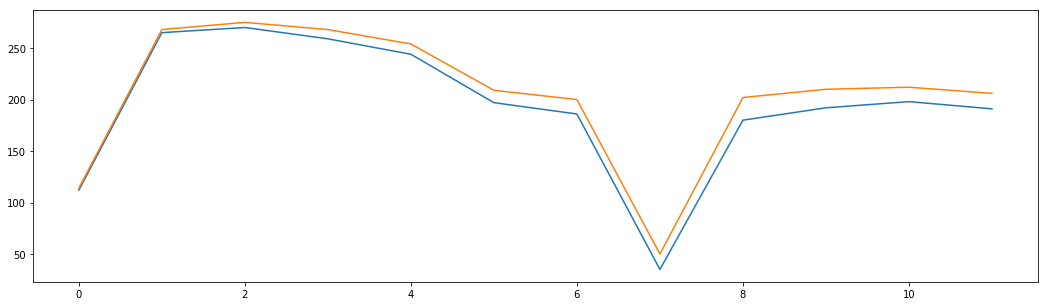

In [29]:
plt.plot(goal)
plt.plot(result)


In [30]:
(((np.array(result.flatten().tolist()[0]) - np.array(goal))**2).mean(axis=0))/(np.std(goal)*np.std(result.flatten().tolist()[0]))

0.04129857414319113

In [16]:
np.std(goal)

64.44953883120931